In [1]:
import pandas as pd
import numpy as np

# Capital Projects - Best Neighborhood
In my part of the project, I chose capital projects as my metric. I am analyzing which neighborhood brings in the most government money to spend on projects that better their neighborhood.

In [2]:
capital_data = pd.read_csv("https://data.wprdc.org/datastore/dump/2fb96406-813e-4031-acfe-1a82e78dc33c")

### This is what my dataset looks like

In [3]:
capital_data

,id,name,task_description,area,budgeted_amount,status,asset_id,asset_type,fiscal_year,start_date,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1850147310,BRIDGE REPAIRS,Columbus Avenue Bridge Handicapped Ramp and In...,Engineering and Construction,100000.0,Planned,Columbus Avenue Bridge,Bridge,2017,2017-02-08,...,Manchester,6.0,21.0,4.200321e+10,1.0,21.0,1.0,1-8,40.458485,-80.024439
1,578777540,CARNAHAN ROAD WENZELL AVENUE (TIP),Construction,Engineering and Construction,560000.0,Planned,Carnahan Road Bridge,Bridge,2017,2017-02-08,...,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,40.407141,-80.034342
2,579358971,CARNAHAN ROAD WENZELL AVENUE (TIP),Construction,Engineering and Construction,2240000.0,Planned,Carnahan Road Bridge,Bridge,2017,2017-02-08,...,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,40.407141,-80.034342
3,726259916,CHARLES ANDERSON BRIDGE (TIP),Preliminary Engineering Phase,Engineering and Construction,35450.0,Planned,Charles Anderson Bridge,Bridge,2017,2017-02-08,...,Central Oakland,3.0,4.0,4.200304e+10,3.0,4.0,4.0,2-8,40.434414,-79.950131
4,2027345037,CHARLES ANDERSON BRIDGE (TIP),Preliminary Engineering Phase,Engineering and Construction,673550.0,Planned,Charles Anderson Bridge,Bridge,2017,2017-02-08,...,Central Oakland,3.0,4.0,4.200304e+10,3.0,4.0,4.0,2-8,40.434414,-79.950131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1430635470,FACILITY IMPROVEMENTS - CITY FACILITIES,62nd STREET WAREHOUSE EXPANSION,Facility Improvement,1600000.0,Planned,Public Works Construction Division Building,Facility,2020,2020-09-30,...,Morningside,7.0,10.0,4.200310e+10,2.0,10.0,5.0,3-7,40.489873,-79.935900
997,1920802278,COMPLETE STREETS,TRAFFIC CALMING - CENTRE AVENUE CORRIDOR,Engineering and Construction,200000.0,Planned,NaN,Non-Asset,2020,2020-09-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,1216752652,COMPLETE STREETS,PEDESTRIAN SIGNAL UPGRADES - FIFTH & HIGHLAND,Engineering and Construction,210000.0,Planned,NaN,Non-Asset,2020,2020-09-30,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-17,40.451940,-79.923930
999,1807693253,COMPLETE STREETS,PEDESTRIAN SIGNAL UPGRADES - FIFTH & WILKINS,Engineering and Construction,75000.0,Planned,NaN,Non-Asset,2020,2020-09-30,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-26,40.447793,-79.937078


It's quite a lot...

Let's see how many neighborhoods are in this dataset

In [4]:
neighborhoods = capital_data['neighborhood'].unique()
print(neighborhoods.size)

74


Checking which neighborhood has the most projects

In [5]:
print(capital_data['neighborhood'].value_counts())

South Side Flats             28
South Side Slopes            20
Elliott                      19
Brookline                    17
Central Business District    16
                             ..
Fairywood                     1
Point Breeze North            1
Mt. Oliver                    1
Spring Garden                 1
California-Kirkbride          1
Name: neighborhood, Length: 73, dtype: int64


South Side Flats is in the lead right now, let's see if it stays that way at the end

### This isn't very important but I wanted to show what areas and projects are being used the most often

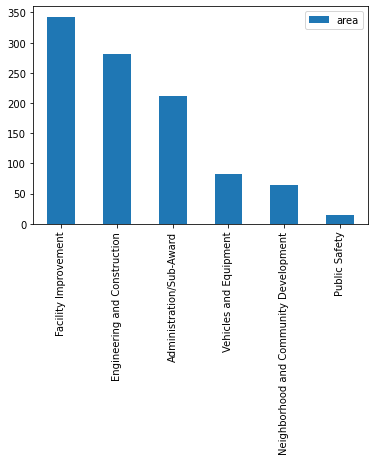

In [6]:
g1 = pd.DataFrame(capital_data['area'].value_counts())
g1.plot.bar()

Most of the projects are facility improvement and engineering and construction while public safety is the least

Is this the same with how much is spent on each area?

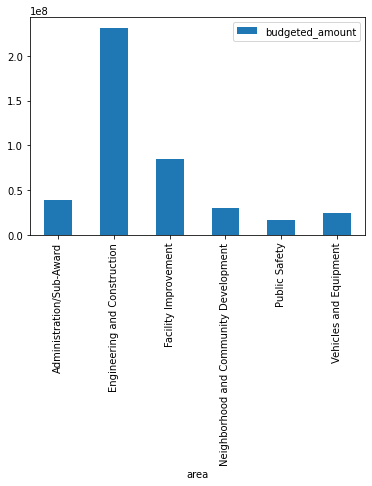

In [7]:
g2 = capital_data.groupby('area')['budgeted_amount'].sum()
g2 = pd.DataFrame(g2)
g2.plot.bar()

Nope, but that isn't surprising

What about asset type?

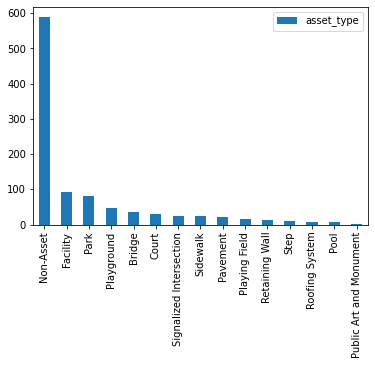

In [8]:
g3 = pd.DataFrame(capital_data['asset_type'].value_counts())
g3.plot.bar()

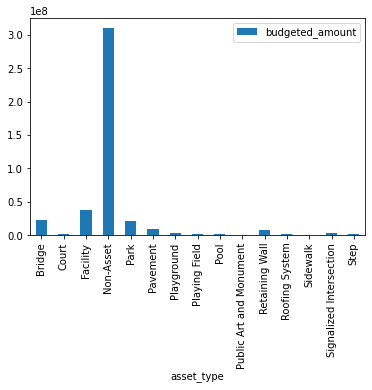

In [9]:
g4 = capital_data.groupby('asset_type')['budgeted_amount'].sum()
g4 = pd.DataFrame(g4)
g4.plot.bar()

Non-Asset has the most spending and is the most often asset type in the dataset

It's under engineering and construction

In [10]:
#editing the data into just the budgeted amount and neighborhood
data = capital_data.loc[:, ['budgeted_amount', 'neighborhood']]
data

,budgeted_amount,neighborhood
0,100000.0,Manchester
1,560000.0,Banksville
2,2240000.0,Banksville
3,35450.0,Central Oakland
4,673550.0,Central Oakland
...,...,...
996,1600000.0,Morningside
997,200000.0,NaN
998,210000.0,Squirrel Hill North
999,75000.0,Squirrel Hill North


In [11]:
t= data.groupby('neighborhood')['budgeted_amount'].sum()
t = pd.DataFrame(t)

### Which neighborhood receives the most money for capital projects?

Text(0.5, 0, 'Total Captial Project Money')

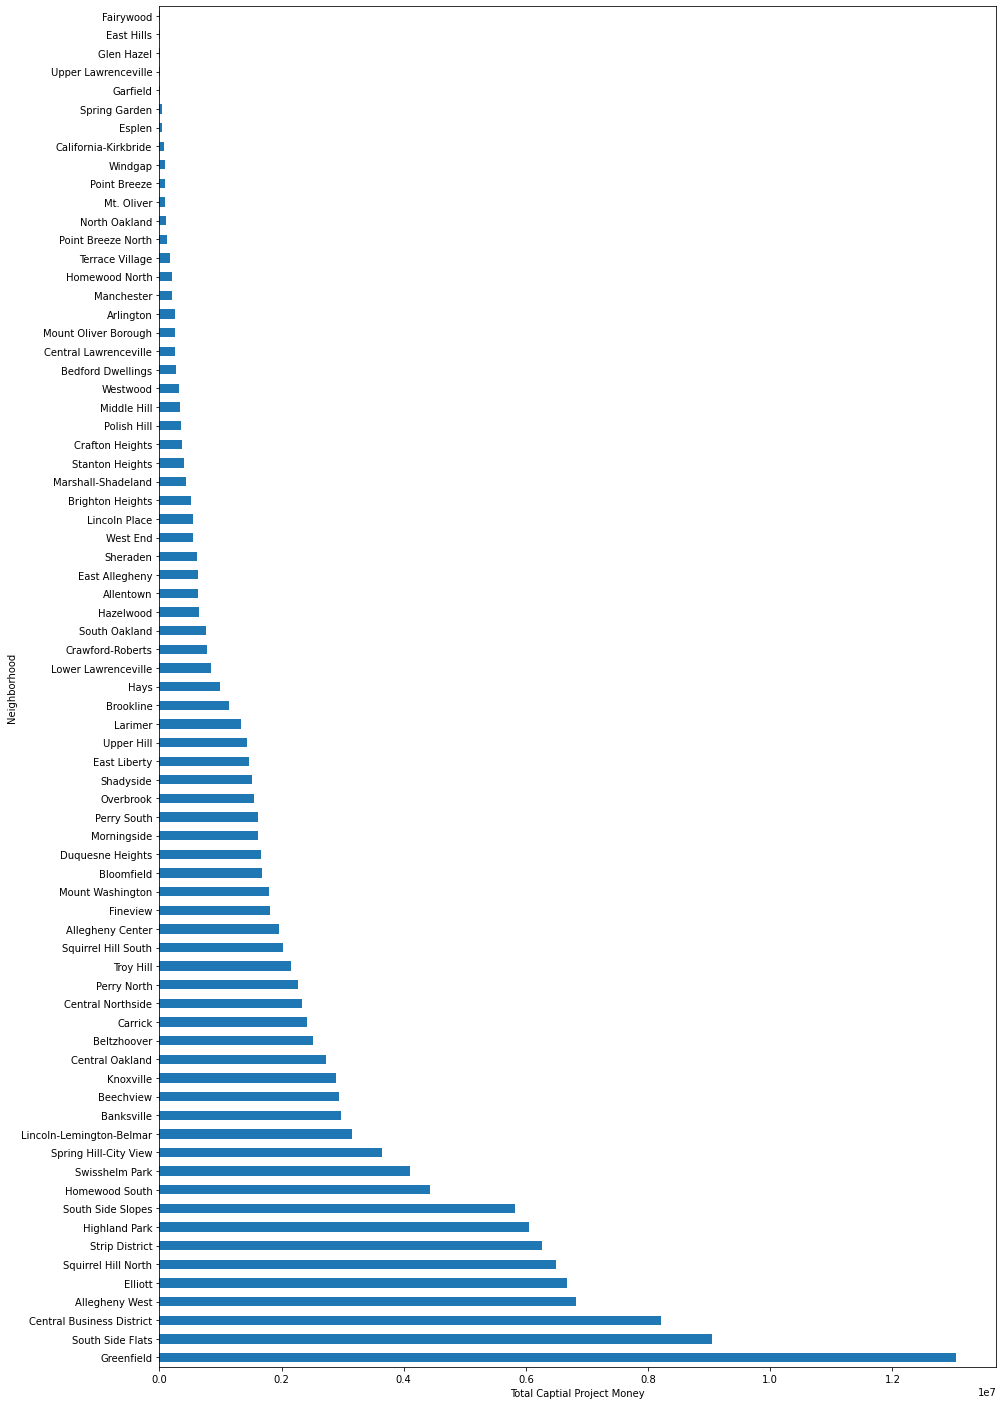

In [12]:
t = t.sort_values(by=['budgeted_amount'], ascending=False)
graph = t.plot.barh(figsize=(15,data.shape[0] * 0.025), legend=None)
graph.set_ylabel('Neighborhood')
graph.set_xlabel('Total Captial Project Money')

neighborhood
Allegheny Center       14.729302
Allegheny West         51.127596
Allentown               4.806531
Arlington               1.876086
Banksville             22.310410
                         ...    
Upper Hill             10.738479
Upper Lawrenceville     0.063787
West End                4.165342
Westwood                2.438911
Windgap                 0.637869
Name: budgeted_amount, Length: 73, dtype: float64
97.91440674175779
67.88447536044792
61.58697390318303
51.12759573673027
50.09724804108087


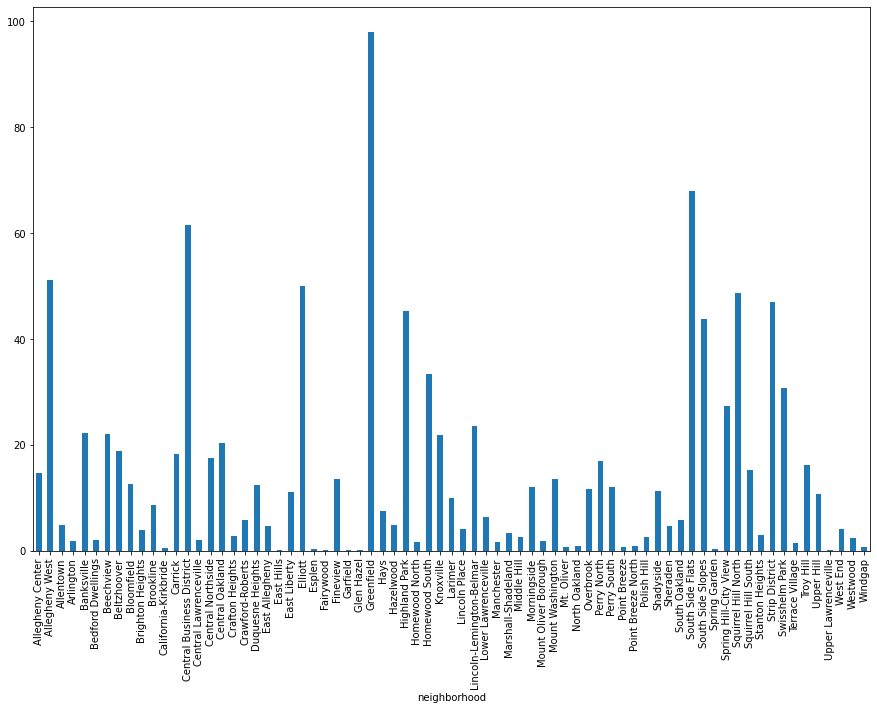

In [20]:
#gives a number 0-100 to each neighborhood
total_sum = capital_data['budgeted_amount'].sum()
final = data.groupby('neighborhood')['budgeted_amount'].sum()/total_sum * 3200
final.plot.bar(figsize=(15,data.shape[0] * 0.01))
print(final)
print(final.loc['Greenfield'])
print(final.loc['South Side Flats'])
print(final.loc['Central Business District'])
print(final.loc['Allegheny West'])
print(final.loc['Elliott'])

## Conclusion
Greenfield is the winner.

While I expected South Side Flats to rank first I am still surprise that Greenfield won. The dataset didn't mention Greenfield as much, however they were given a large budget for each project so I suppose it's not TOO shocking. Greenfield also had a lot of engineering and facility improvement projects so that might be a reason they ranked first.

In [ ]:
#g5 = data.groupby('neighborhood')['budgeted_amount'].sum()
#g5 = pd.DataFrame(g5)
#g5.loc[['Greenfield', 'South Side Flats', 'Central Business District']]
#print(g5)